In [0]:
from keras.layers import Dense,Conv2D,BatchNormalization,Reshape,Flatten,Concatenate
from keras.layers import ZeroPadding2D,LeakyReLU,Input,Conv2DTranspose,Dropout,Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Pix2PixGAN():
    def __init__(self):
        self.img_rows = 256
        self.img_cols = 256
        self.channels = 3
        self.img_shape = (self.img_rows,self.img_cols,self.channels)
        
        self.dset_name = 'apple2orange'
        ################################
        
        #PatchGAN
        
        patch = 70
        self.disc_patch = (patch,patch,1)
        
        
        self.discriminator = build_discriminator()
        
        
        self.generator = build_generator()
        
        
        img_A = Input(shape = self.img_shape)
        img_B = Input(shape = self.img_shape)
        
        
        gentd_img_A = self.generator(img_B)
        
        validity = self.discriminator(gentd_img_A,img_B)
        
        self.combined = Model(inputs = [img_A,img_B],outputs = [validity,gentd_img_A])
        self.combined.compile(loss = ['mse','mae'],
                             loss_weights = [1,100],
                             optimizer = optimizer)
        
        
        
        
        
        
    def conv_block(inp , n_filters=64, bn =True ,leak = 0.0 ):
            
            conv = Conv2D(input_shape = img_shape,filters=n_filters, kernel_size=4,strides=2)(inp)
            if bn:
                conv = BatchNormalization()(conv)
            conv = LeakyReLU(0.2)(conv)            
            return conv

    def deconv_block(inp,n_filters = 64,leak = 0.0,dropout = True):

        deconv = Conv2DTranspose(64,kernel_size = 4, strides = 2)(inp)
        deconv = BatchNormalization()(deconv)
        if dropout:
            deconv = Dropout(0.5)(deconv)
        deconv = LeakyReLU(leak)(deconv)
        return deconv
        
        
        
        
        
        
    def build_generator():
        
        
        input_img = Input(shape = self.img_shape)
        
        ck1 = conv_block(input_img, n_filters  =64, bn = False,leak = 0.2)
        ck2 = conv_block(ck1,n_filters=128,leak = 0.2)
        ck3 = conv_block(ck2,n_filters=256,leak = 0.2)
        ck4 = conv_block(ck3,n_filters=512,leak = 0.2)
        ck5 = conv_block(ck4,n_filters=512,leak = 0.2)
        ck6 = conv_block(ck5,n_filters=512,leak = 0.2)
        ck7 = conv_block(ck6,n_filters=512,leak = 0.2)
        ck8 = conv_block(ck7,n_filters=512,leak = 0.2)
        
        
        cd1 = deconv_block(ck8,512)
        
        cd2 = deconv_block(cd1,512)
        con1 = Concatenate()([cd2,ck7])
        
        cd3 = deconv_block(con1,512)
        con2 = Concatenate()([cd3,ck6])
        
        cd4 = deconv_block(con2,512)
        con3 = Concatenate()([cd4,ck5])
        
        cd5 = deconv_block(con3,512)
        con4 = Concatenate()([cd5,ck4])
        
        cd6 = deconv_block(con4,256)
        con5 = Concatenate()([cd6,ck3])
        
        cd7 = deconv_block(con5,128)
        con6 = Concatenate()([cd7,ck2])
        
        cd8 = deconv_block(con6,64)
        con7 = Concatenate()([cd8,ck1])
        
        conv = Conv2D(3,kernel_size = 4,strides = 2)(con7)
        out = Activation('tanh')(conv)
        
        return Model(input_img,out)
    
    
    def build_discriminator():
        
        input1 = Input(shape = self.img_shape)
        input2 = Input(shape = self.img_shape)
        
        patches1 = get_patches(input1)
        patches2 = get_patches(input2)
            
            
        
        ck1 = conv_block(input,64,bn=False ,leak = 0.2 )
        ck2 = conv_block(ck1,128,leak = 0.2)
        ck3 = conv_block(ck2,256,leak = 0.2)
        ck4 = conv_block(ck3,512,leak = 0.2)
        cout = Conv2D(1,kernel_size = 4, strides = 2)(ck4)
        out = Activation('sigmoid')(cout)
        
        return Model([input1,input2],out)
    
    
    def train():
        valid = np.ones((batch_size,)+ self.disc_patch)
        fake = np.ones((batch_size,) + self.disc_patch)
        
        
        for epoch in range(epochs):
            for batch_i,(imgs_A,imgs_B) in enumerate(   
            

SyntaxError: ignored

In [0]:
import cv2

In [0]:
!pwd

/content


In [0]:

img_shape = 2
def conv_block(inp , n_filters=64, bn =True , leak = 0.0  ):

    conv = Conv2D(filters=n_filters, kernel_size=4,strides=2)(inp)
    if bn:
        conv = BatchNormalization()(conv)
    conv = LeakyReLU(leak)(conv)

    return conv

In [0]:
def deconv_block(inp,n_filters = 64,leak = 0.0,dropout = True):
    
    deconv = Conv2DTranspose(64,kernel_size = 4, strides = 2)(inp)
    deconv = BatchNormalization()(deconv)
    if dropout:
        deconv = Dropout(0.5)(deconv)
    
    deconv = LeakyReLU(leak)(deconv)
    return deconv
    

In [0]:
wget -x --load-cookies cookies.txt -nH https://www.kaggle.com/vikramtiwari/pix2pix-dataset/download

SyntaxError: ignored

In [0]:
def get_patches(img):
    patches= []
    print(img.shape)
    rows,columns,_ = img.shape
    print(columns)
    i=0
    j=0
    
    
    print(type(rows))

    for r in range(0,rows,patch_r):

        if (r + patch_r) > rows:
            patch_r = rows - (j*patch_r)
            print("updated row patch size",patch_c,i)
            j=0
        else:
            j+=1
        for c in range(0,columns,patch_c):

            if (c + patch_c )  > columns:
                patch_c = columns - (i * patch_c)
                print("updated column patch size",patch_c,i)
                i = 0
            else:
                i+=1
            crop = img[r : r + patch_r, c : c + patch_c]
            patches.append(crop)

            #cv2.imwrite('./imgs/crop{}{}.jpg'.format(r,c),crop)
            #cv2.waitKey(0)


            print(patch_c)
            patch_c = 70

        print("Row",patch_r,j)
        patch_r = 70
    
    return patches

   
    
    
    
    

In [0]:
#import os 
#import cv2
def get_patch(img,patch_r ,patch_c):
    patches= []
    print(img.shape)
    rows,columns,_ = img.shape
    print(columns)
    i=0
    j=0
    #patch_c = 70
    #patch_r = 70
    print(type(rows))

    for r in range(0,rows,patch_r):

        if (r + patch_r) > rows:
            patch_r = rows - (j*patch_r)
            print("updated row patch size",patch_c,i)
            j=0
        else:
            j+=1
        for c in range(0,columns,patch_c):

            if (c + patch_c )  > columns:
                patch_c = columns - (i * patch_c)
                print("updated column patch size",patch_c,i)
                i = 0
            else:
                i+=1
            crop = img[r : r + patch_r, c : c + patch_c]
            patches.append(crop)

            cv2.imwrite('./imgs/crop{}{}.jpg'.format(r,c),crop)
            #cv2.waitKey(0)


            print(patch_c)
            patch_c = 256

        print("Row",patch_r,j)
        patch_r = 256
    


    
    

In [0]:
!mkdir imgs

In [0]:
!rm -r imgs

In [0]:
len(imgsa)

378

AttributeError: ignored

In [0]:
idx = np.random.randint(0,len(a),size= 8)

In [0]:
imnist = X_train[idx]

In [0]:
from keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
type(X_train)

numpy.ndarray

In [0]:
a = [[2*i,3*i] for i in range(32)]
a = np.asarray(a)

In [0]:
b = a[idx]

In [0]:
ifsa = np.asarray(imgsa)

In [0]:
c = ifsa[idx]

TypeError: ignored

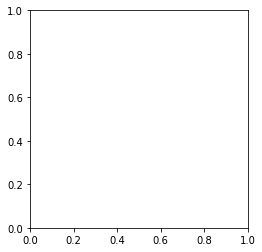

In [0]:
for h,f in c:
    plt.figure()
    plt.imshow(f,)
    plt.figure()
    plt.imshow(h)

In [0]:
import random


In [0]:
random.randint()

## Default

In [0]:
class Pix2PixGAN():
    def __init__(self):
        self.img_rows = 256
        self.img_cols = 256
        self.channels = 3
        self.img_shape = (self.img_rows,self.img_cols,self.channels)
        
        self.dset_name = 'apple2orange'
        ################################
        
        #PatchGAN
        
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch,patch,1)
        
        
        self.discriminator = build_discriminator()
        
        self.generator = build_generator()
        
        img_a =Input(shape = self.img_shape)
        img_b = Ibput(shape = self.img_shape)        
        
                
        fake_a = self.generator(img_b)
        
        self.discriminator.trainable = False
       
        validity = self.discriminator(fake_a,img_b)
        
        self.combined = Model(inputs = [img_a,img_b],outputs = [validity,fake_a])
        self.combined.compile(loss = ['mse','mae'],
                             loss_wrights = [1,100],
                             optimizer = optimizer)
        
        
        
        
    def load_batch(batch_size):
        
        hf_pair_list = load_imgs()
        idx = np.random.randint(0,len(imgs),size= batch_size)
        batch = 
        
        
        
        
        
    def conv_block(inp , n_filters=64, bn =True ,leak = 0.0 ):
            
            conv = Conv2D(input_shape = img_shape,filters=n_filters, kernel_size=4,strides=2)(inp)
            if bn:
                conv = BatchNormalization()(conv)
            conv = LeakyReLU(0.2)(conv)            
            return conv

    def deconv_block(inp,n_filters = 64,leak = 0.0,dropout = True):

        deconv = Conv2DTranspose(64,kernel_size = 4, strides = 2)(inp)
        deconv = BatchNormalization()(deconv)
        if dropout:
            deconv = Dropout(0.5)(deconv)
        deconv = LeakyReLU(leak)(deconv)
        return deconv
        
        
        
        
        
        
    def build_generator():
        
        
        input_img = Input(shape = self.img_shape)
        
        ck1 = conv_block(input_img, n_filters  =64, bn = False,leak = 0.2)
        ck2 = conv_block(ck1,n_filters=128,leak = 0.2)
        ck3 = conv_block(ck2,n_filters=256,leak = 0.2)
        ck4 = conv_block(ck3,n_filters=512,leak = 0.2)
        ck5 = conv_block(ck4,n_filters=512,leak = 0.2)
        ck6 = conv_block(ck5,n_filters=512,leak = 0.2)
        ck7 = conv_block(ck6,n_filters=512,leak = 0.2)
        ck8 = conv_block(ck7,n_filters=512,leak = 0.2)
        
        
        cd1 = deconv_block(ck8,512)
        
        cd2 = deconv_block(cd1,512)
        con1 = Concatenate()([cd2,ck7])
        
        cd3 = deconv_block(con1,512)
        con2 = Concatenate()([cd3,ck6])
        
        cd4 = deconv_block(con2,512)
        con3 = Concatenate()([cd4,ck5])
        
        cd5 = deconv_block(con3,512)
        con4 = Concatenate()([cd5,ck4])
        
        cd6 = deconv_block(con4,256)
        con5 = Concatenate()([cd6,ck3])
        
        cd7 = deconv_block(con5,128)
        con6 = Concatenate()([cd7,ck2])
        
        cd8 = deconv_block(con6,64)
        con7 = Concatenate()([cd8,ck1])
        
        conv = Conv2D(3,kernel_size = 4,strides = 2)(con7)
        out = Activation('tanh')(conv)
        
        return Model(input_img,out)
    
    
    def build_discriminator():
        
        input1 = Input(shape = self.img_shape)
        input2 = Input(shape = self.img_shape)
        
        patches1 = get_patches(input1)
        patches2 = get_patches(input2)
            
            
        
        ck1 = conv_block(input,64,bn=False ,leak = 0.2 )
        ck2 = conv_block(ck1,128,leak = 0.2)
        ck3 = conv_block(ck2,256,leak = 0.2)
        ck4 = conv_block(ck3,512,leak = 0.2)
        cout = Conv2D(1,kernel_size = 4, strides = 2)(ck4)
        out = Activation('sigmoid')(cout)
        
        return Model([input1,input2],out)
    
    
    def train():
        
        start_time = datetime.datetime.now()
        hf_pair_list = load_imgs()
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)
        
        
        
        for epoch in range(epochs):
            for batch_i, (imgs_a,imgs_b) in enumerate(self.hf_pair_list)
        
            

In [3]:
!wget http://cmp.felk.cvut.cz/~tylecr1/facade/CMP_facade_DB_base.zip

--2019-12-13 09:46:45--  http://cmp.felk.cvut.cz/~tylecr1/facade/CMP_facade_DB_base.zip
Resolving cmp.felk.cvut.cz (cmp.felk.cvut.cz)... 147.32.84.2
Connecting to cmp.felk.cvut.cz (cmp.felk.cvut.cz)|147.32.84.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36517004 (35M) [application/zip]
Saving to: ‘CMP_facade_DB_base.zip’

CMP_facade_DB_base. 100%[===================>]  34.83M  72.0MB/s    in 0.5s    

2019-12-13 09:46:46 (72.0 MB/s) - ‘CMP_facade_DB_base.zip’ saved [36517004/36517004]



In [4]:
!unzip CMP_facade_DB_base.zip

Archive:  CMP_facade_DB_base.zip
   creating: base/
  inflating: base/cmp_b0001.jpg      
  inflating: base/cmp_b0001.png      
  inflating: base/cmp_b0001.xml      
  inflating: base/cmp_b0002.jpg      
  inflating: base/cmp_b0002.png      
  inflating: base/cmp_b0002.xml      
  inflating: base/cmp_b0003.jpg      
  inflating: base/cmp_b0003.png      
  inflating: base/cmp_b0003.xml      
  inflating: base/cmp_b0004.jpg      
  inflating: base/cmp_b0004.png      
  inflating: base/cmp_b0004.xml      
  inflating: base/cmp_b0005.jpg      
  inflating: base/cmp_b0005.png      
  inflating: base/cmp_b0005.xml      
  inflating: base/cmp_b0006.jpg      
  inflating: base/cmp_b0006.png      
  inflating: base/cmp_b0006.xml      
  inflating: base/cmp_b0007.jpg      
  inflating: base/cmp_b0007.png      
  inflating: base/cmp_b0007.xml      
  inflating: base/cmp_b0008.jpg      
  inflating: base/cmp_b0008.png      
  inflating: base/cmp_b0008.xml      
  inflating: base/cmp_b0009.jpg     

In [0]:
import os
import cv2
import random
import copy
class Load_imgs():
    
    def __init__(self):
        self.imgs = []
        print(type(self.imgs))
        folder = 'base'
        names = os.listdir(folder)
        names.sort()
        for img_name in names[::3]:

            facade = cv2.imread(os.path.join(folder,(img_name.split('.')[0]+'.png' ) ) )
            house = cv2.imread(os.path.join(folder,img_name ))
            self.imgs.append([house,facade])
        print("Loading Of Data Complete! Total NUmber of IMgs is ",len(self.imgs))
        self.imgs_bkup = copy.deepcopy(self.imgs)
    
    def get_imgs(self):
        return self.imgs
    
    def create_batch(self,bs = 1,reload = False):
        """
        provides the next batch of imgs
        bs: Batch size of imgs; default value = 1
        reload: Set true if the img list has been completely iterated; defualt value= False
        """
        if reload:
            self.imgs = copy.deepcopy(self.imgs_bkup)
        
        if len(self.imgs) == 0:
            print("Img list is EMpty! Please set \"reload=\" parameter to 'True'")
        
        else:
            if len(self.imgs) < bs:
                print("THe number of imgs in last batch is: " ,bs-len(self.imgs))
                print("Kindly set the \"reload=\" parameter to 'True' now")
            random.shuffle(self.imgs)
            batch = self.imgs[:bs]
            del self.imgs[:bs]
            return batch

        
        

In [0]:
imgs = [[i,2*i] for i in range(1,11)]

In [0]:
bs = 5

In [0]:
tatch = imgs[:bs]

In [0]:
imgs = imgs - tatch

TypeError: ignored

In [0]:
del imgs[:bs]

In [0]:
imgs

[[6, 12], [7, 14], [8, 16], [9, 18], [10, 20]]

In [0]:
imgs[:5]

[[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]

In [0]:
imgs[5:len(imgs)]

[[6, 12], [7, 14], [8, 16], [9, 18], [10, 20]]

In [0]:
def next_batch(bs):
        random.shuffle(self.imgs)
        batch = imgs[0:bs]
        im

10

In [0]:
3242/512 

6.33203125

In [37]:
imgsa = Load_imgs()


<class 'list'>
Loading Of Data Complete! Total NUmber of IMgs is  378


In [38]:
batches = []
for i in range(10):
    batch = imgsa.create_batch(64)
    batches.append(batch)
    


THe number of imgs in last batch is:  6
Kindly set the "reload=" parameter to 'True' now
Img list is EMpty! Please set "reload=" parameter to 'True'
Img list is EMpty! Please set "reload=" parameter to 'True'
Img list is EMpty! Please set "reload=" parameter to 'True'
Img list is EMpty! Please set "reload=" parameter to 'True'


In [0]:
h,f = batches[0][0]

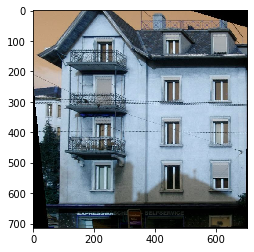

In [47]:
plt.imshow(h)

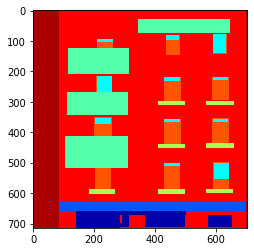

In [48]:
plt.imshow(f)

In [0]:
batch = imgsa.create_batch(377,True)

In [40]:
nxt_batch=imgsa.create_batch(2)

THe number of imgs in last batch is:  1
Kindly set the "reload=" parameter to 'True' now


In [0]:
newbtch = imgsa.create_batch(64,True)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
timgs

[[array([[[217, 204, 190],
          [217, 204, 190],
          [217, 204, 190],
          ...,
          [228, 218, 211],
          [229, 219, 212],
          [229, 219, 212]],
  
         [[217, 204, 190],
          [217, 204, 190],
          [217, 204, 190],
          ...,
          [228, 218, 211],
          [229, 219, 212],
          [229, 219, 212]],
  
         [[217, 204, 190],
          [217, 204, 190],
          [217, 204, 190],
          ...,
          [228, 218, 211],
          [229, 219, 212],
          [229, 219, 212]],
  
         ...,
  
         [[ 45,  54,  57],
          [ 44,  53,  56],
          [ 43,  52,  55],
          ...,
          [ 10,  11,  15],
          [ 11,  11,  17],
          [ 12,  10,  16]],
  
         [[ 32,  44,  46],
          [ 32,  44,  46],
          [ 33,  45,  47],
          ...,
          [ 10,  10,  16],
          [ 12,  11,  20],
          [ 11,  10,  19]],
  
         [[ 44,  56,  58],
          [ 43,  55,  57],
          [ 42,  54,  56

In [0]:
h,f = imgsa.get_imgs()[0]

In [0]:
a = "cmp_b0289.jpg"

In [0]:
a.split('.')[0]

'cmp_b0289'

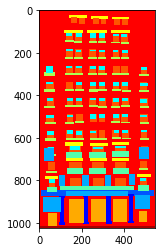

In [0]:
plt.imshow(f)

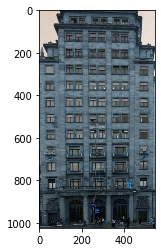

In [0]:
plt.imshow(h)

In [0]:
len(names[::3])

378

In [0]:
print((names[i].split('.'))[0])

AttributeError: ignored